In [1]:
import pandas as pd
import numpy as np

In [2]:
part_d_df = pd.read_csv('data/part_d_2016.csv', low_memory=False)
exclusion_df = pd.read_csv('data/exclusion_list_2017.csv', low_memory=False)
print("The data has a size of {}".format(part_d_df.shape))

The data has a size of (24964300, 21)


In [3]:
part_d_df.head(2)

npi nppes_provider_last_org_name nppes_provider_first_name  \
0  1104855030                        MOREL                   GUSTAVO   
1  1306971445                        FRIED                      TOBI   

  nppes_provider_city nppes_provider_state specialty_description  \
0       IRON MOUNTAIN                   MI            Hematology   
1             SHAWNEE                   OK       Family Practice   

  description_flag       drug_name    generic_name  bene_count  ...  \
0                S    AZITHROMYCIN    AZITHROMYCIN        11.0  ...   
1                S  TAMSULOSIN HCL  TAMSULOSIN HCL         NaN  ...   

   total_30_day_fill_count  total_day_supply  total_drug_cost  \
0                     14.0                70             76.9   
1                     43.0              1290            419.4   

   bene_count_ge65  bene_count_ge65_suppress_flag total_claim_count_ge65  \
0              NaN                              #                    NaN   
1              NaN                              *                   16.0   

   ge65_suppress_flag total_30_day_fill_count_ge65  total_day_supply_ge65  \
0                   #                          NaN                    NaN   
1                 NaN                         32.0                  960.0   

   total_drug_cost_ge65  
0                   NaN  
1                290.26  

[2 rows x 21 columns]

In [4]:
exclusion_df.head(2)
len(exclusion_df)

678

In [5]:
# reorganize data columns
part_d_df = part_d_df[['npi', 'nppes_provider_city','nppes_provider_state', 'specialty_description', 'description_flag',\
                        'drug_name', 'generic_name', 'bene_count', 'total_claim_count','total_day_supply', \
                        'total_drug_cost', 'bene_count_ge65', 'total_claim_count_ge65', 'total_day_supply_ge65',\
                        'total_drug_cost_ge65']]

# assigning exclusion (False = 0, True = 1)
exclusion_npi = exclusion_df['NPI'].values.tolist()

part_d_df['is_excluded'] = 0
part_d_df.loc[part_d_df['npi'].isin(exclusion_npi), 'is_excluded'] = 1

# get US data to analyze
states = ['AK', 'AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', \
          'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', \
          'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', \
          'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', \
          'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI',' WY']

part_d_df = part_d_df[part_d_df['nppes_provider_state'].isin(states)]

print("The data has a size of {}".format(part_d_df.shape))

The data has a size of (24548475, 16)


In [6]:
len(exclusion_df['NPI'].unique())

675

In [7]:
len(exclusion_df['SPECIALTY'].unique())

68

In [8]:
len(part_d_df.loc[part_d_df['npi'].isin(exclusion_npi)])

5415

In [9]:
part_d_df.loc[part_d_df['is_excluded']==1].head(2)

npi nppes_provider_city nppes_provider_state  \
882   1093755134          HUNTINGTON                   IN   
3503  1831202126               PHILA                   PA   

     specialty_description description_flag    drug_name generic_name  \
882      Internal Medicine                S  SIMVASTATIN  SIMVASTATIN   
3503     Internal Medicine                S     DIAZEPAM     DIAZEPAM   

      bene_count  total_claim_count  total_day_supply  total_drug_cost  \
882         54.0                254             13892          2416.62   
3503        11.0                 27              1086           300.67   

      bene_count_ge65  total_claim_count_ge65  total_day_supply_ge65  \
882               NaN                   230.0                12663.0   
3503              NaN                     NaN                    NaN   

      total_drug_cost_ge65  is_excluded  
882                2183.88            1  
3503                   NaN            1

In [10]:
# Top 20 states which has the most prescribers
part_d_df_state_count = part_d_df.groupby('nppes_provider_state').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_state_count

npi  nppes_provider_city  specialty_description  \
nppes_provider_state                                                        
CA                    2380009              2380009                2380009   
NY                    1701773              1701773                1701773   
FL                    1661974              1661974                1661974   
TX                    1534331              1534331                1534331   
PA                    1265591              1265591                1265591   
OH                    1034221              1034221                1034221   
NC                     896563               896563                 896563   
IL                     895524               895524                 895524   
MI                     867603               867603                 867603   
GA                     706251               706251                 706251   
NJ                     664190               664190                 664190   
TN                     656935               656935                 656935   
MA                     604306               604306                 604306   
MO                     566351               566351                 566351   
IN                     562622               562622                 562622   
VA                     552765               552765                 552765   
WA                     475063               475063                 475063   
KY                     473216               473216                 473216   
WI                     470199               470199                 470199   
AZ                     443002               443002                 443002   

                      description_flag  drug_name  generic_name  bene_count  \
nppes_provider_state                                                          
CA                             2380009    2380009       2380009      952300   
NY                             1701773    1701773       1701773      631302   
FL                             1661974    1661974       1661974      750825   
TX                             1534331    1534331       1534331      647366   
PA                             1265591    1265591       1265591      468451   
OH                             1034221    1034221       1034221      412928   
NC                              896563     896563        896563      351434   
IL                              895524     895524        895524      331277   
MI                              867603     867603        867603      354924   
GA                              706251     706251        706251      300066   
NJ                              664190     664190        664190      252101   
TN                              656935     656935        656935      277406   
MA                              604306     604306        604306      207599   
MO                              566351     566351        566351      218003   
IN                              562622     562622        562622      224268   
VA                              552765     552765        552765      209687   
WA                              475063     475063        475063      162851   
KY                              473216     473216        473216      192321   
WI                              470199     470199        470199      168950   
AZ                              443002     443002        443002      190958   

                      total_claim_count  total_day_supply  total_drug_cost  \
nppes_provider_state                                                         
CA                              2380009           2380009          2380009   
NY                              1701773           1701773          1701773   
FL                              1661974           1661974          1661974   
TX                              1534331           1534331          1534331   
PA                              1265591           1265591          1265591   
OH                              1034221       

In [11]:
# exclusion and non-exclusion prescribers
prescribers = part_d_df.groupby('is_excluded').count().sort_values('npi', ascending=False).iloc[0:2]
prescribers

npi  nppes_provider_city  nppes_provider_state  \
is_excluded                                                        
0            24543060             24543060              24543060   
1                5415                 5415                  5415   

             specialty_description  description_flag  drug_name  generic_name  \
is_excluded                                                                     
0                         24543060          24543060   24543060      24543060   
1                             5415              5415       5415          5415   

             bene_count  total_claim_count  total_day_supply  total_drug_cost  \
is_excluded                                                                     
0               9594208           24543060          24543060         24543060   
1                  2012               5415              5415             5415   

             bene_count_ge65  total_claim_count_ge65  total_day_supply_ge65  \
is_excluded                                                                   
0                    3388531                14074344               14074344   
1                        865                    3148                   3148   

             total_drug_cost_ge65  
is_excluded                        
0                        14074344  
1                            3148

In [12]:
# export exclusion providers data to do statistics analysis, run once when needed by uncommenting two lines below
part_d_df_exclusion = part_d_df[part_d_df['is_excluded'] == 1]
#part_d_df_exclusion.to_csv('exclusion2017.csv')

In [13]:
len(part_d_df_exclusion['npi'].unique())

151

In [14]:
part_d_df_exclusion[['npi']].to_csv('2016_part_d_e_npi.csv')

In [13]:
len(part_d_df_exclusion['drug_name'].unique())

659

In [14]:
len(part_d_df_exclusion['specialty_description'].unique())

32

In [15]:
part_d_df_exclusion['specialty_description'].unique()

array(['Internal Medicine', 'Otolaryngology', 'Pain Management',
       'Obstetrics & Gynecology', 'Endocrinology', 'Geriatric Medicine',
       'Obstetrics/Gynecology', 'Family Practice', 'Nurse Practitioner',
       'Anesthesiology', 'General Practice', 'Psychiatry',
       'Interventional Pain Management',
       'Cardiovascular Disease (Cardiology)', 'Emergency Medicine',
       'Infectious Disease', 'Neurology', 'Specialist', 'Podiatry',
       'Certified Clinical Nurse Specialist', 'Plastic Surgery',
       'Neurosurgery', 'Dentist', 'Physician Assistant', 'Dermatology',
       'Psychiatry & Neurology', 'Urology',
       'Physical Medicine and Rehabilitation', 'General Surgery',
       'Family Medicine', 'Vascular Surgery', 'Allergy/ Immunology'],
      dtype=object)

In [16]:
# Top 10 NPIs which are the most excluded prescribers
part_d_df_exclusion_npi_count = part_d_df_exclusion.groupby('npi').count().sort_values('drug_name', ascending=False).iloc[0:10]
part_d_df_exclusion_npi_count.reset_index(level=["npi"], inplace=True)
part_d_df_exclusion_npi_count

npi  nppes_provider_city  nppes_provider_state  \
0  1457356768                  348                   348   
1  1174545271                  254                   254   
2  1346237096                  238                   238   
3  1093755134                  232                   232   
4  1215963715                  193                   193   
5  1639275969                  153                   153   
6  1952477622                  148                   148   
7  1831202126                  142                   142   
8  1225067044                  138                   138   
9  1720060460                  114                   114   

   specialty_description  description_flag  drug_name  generic_name  \
0                    348               348        348           348   
1                    254               254        254           254   
2                    238               238        238           238   
3                    232               232        232           232   
4                    193               193        193           193   
5                    153               153        153           153   
6                    148               148        148           148   
7                    142               142        142           142   
8                    138               138        138           138   
9                    114               114        114           114   

   bene_count  total_claim_count  total_day_supply  total_drug_cost  \
0         179                348               348              348   
1         108                254               254              254   
2         108                238               238              238   
3         109                232               232              232   
4          74                193               193              193   
5          69                153               153              153   
6          63                148               148              148   
7          56                142               142              142   
8          46                138               138              138   
9          34                114               114              114   

   bene_count_ge65  total_claim_count_ge65  total_day_supply_ge65  \
0               77                     258                    258   
1               28                     165                    165   
2               36                     143                    143   
3               25                     144                    144   
4               26                     117                    117   
5               23                      89                     89   
6               14                      76                     76   
7               16                      94                     94   
8                7                      74                     74   
9               10                      74                     74   

   total_drug_cost_ge65  is_excluded  
0                   258          348  
1                   165          254  
2                   143          238  
3                   144          232  
4                   117          193  
5                    89          153  
6                    76          148  
7                    94          142  
8                    74          138  
9                    74          114

In [17]:
# Top 10 states which has the most excluded prescribers
part_d_df_exclusion_state_count = part_d_df_exclusion.groupby('nppes_provider_state').count().sort_values('npi', ascending=False).iloc[0:10]
part_d_df_exclusion_state_count.reset_index(level=["nppes_provider_state"], inplace=True)
part_d_df_exclusion_state_count

nppes_provider_state  npi  nppes_provider_city  specialty_description  \
0                   NY  794                  794                    794   
1                   MI  632                  632                    632   
2                   FL  409                  409                    409   
3                   NC  348                  348                    348   
4                   CA  338                  338                    338   
5                   VA  287                  287                    287   
6                   GA  272                  272                    272   
7                   NJ  270                  270                    270   
8                   PA  252                  252                    252   
9                   IL  243                  243                    243   

   description_flag  drug_name  generic_name  bene_count  total_claim_count  \
0               794        794           794         261                794   
1               632        632           632         274                632   
2               409        409           409         143                409   
3               348        348           348         179                348   
4               338        338           338          92                338   
5               287        287           287          97                287   
6               272        272           272         135                272   
7               270        270           270          84                270   
8               252        252           252         117                252   
9               243        243           243          80                243   

   total_day_supply  total_drug_cost  bene_count_ge65  total_claim_count_ge65  \
0               794              794              135                     450   
1               632              632              104                     354   
2               409              409               49                     226   
3               348              348               77                     258   
4               338              338               57                     197   
5               287              287               50                     170   
6               272              272               50                     164   
7               270              270               37                     147   
8               252              252               41                     142   
9               243              243               26                     147   

   total_day_supply_ge65  total_drug_cost_ge65  is_excluded  
0                    450                   450          794  
1                    354                   354          632  
2                    226                   226          409  
3                    258                   258          348  
4                    197                   197          338  
5                    170                   170          287  
6                    164                   164          272  
7                    147                   147          270  
8                    142                   142          252  
9                    147                   147          243

In [18]:
# Top 20 specialties which has the most excluded prescribers
part_d_df_exclusion_specialty_count = part_d_df_exclusion.groupby('specialty_description').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_exclusion_specialty_count.reset_index(level=["specialty_description"], inplace=True)
part_d_df_exclusion_specialty_count

specialty_description   npi  nppes_provider_city  \
0                Internal Medicine  2083                 2083   
1                  Family Practice  1485                 1485   
2                       Psychiatry   320                  320   
3                  Pain Management   300                  300   
4                    Endocrinology   148                  148   
5               Nurse Practitioner   133                  133   
6                   Anesthesiology   112                  112   
7               Infectious Disease   104                  104   
8          Obstetrics & Gynecology    76                   76   
9               Emergency Medicine    65                   65   
10                        Podiatry    61                   61   
11                      Specialist    59                   59   
12                General Practice    57                   57   
13              Geriatric Medicine    48                   48   
14                 Plastic Surgery    43                   43   
15                       Neurology    36                   36   
16                 Family Medicine    31                   31   
17           Obstetrics/Gynecology    31                   31   
18  Interventional Pain Management    29                   29   
19                    Neurosurgery    28                   28   

    nppes_provider_state  description_flag  drug_name  generic_name  \
0                   2083              2083       2083          2083   
1                   1485              1485       1485          1485   
2                    320               320        320           320   
3                    300               300        300           300   
4                    148               148        148           148   
5                    133               133        133           133   
6                    112               112        112           112   
7                    104               104        104           104   
8                     76                76         76            76   
9                     65                65         65            65   
10                    61                61         61            61   
11                    59                59         59            59   
12                    57                57         57            57   
13                    48                48         48            48   
14                    43                43         43            43   
15                    36                36         36            36   
16                    31                31         31            31   
17                    31                31         31            31   
18                    29                29         29            29   
19                    28                28         28            28   

    bene_count  total_claim_count  total_day_supply  total_drug_cost  \
0          841               2083              2083             2083   
1          489               1485              1485             1485   
2          115                320               320              320   
3          106                300               300              300   
4           63                148               148              148   
5           30                133               133              133   
6           59                112               112              112   
7           28                104               104              104   
8           49                 76                76               76   
9            6                 65                65               65   
10          46                 61                61               61   
11          15                 59                59               59   
12          15                 57                57               57   
13          14                 48                48               48   
14          24                 43                43               43   
15 

After full US dataset analysis, will use NJ data to do detailed analysis

In [19]:
part_d_df_small=part_d_df[part_d_df['nppes_provider_state']=='NJ']

In [20]:
len(part_d_df_small)

664190

In [21]:
# exclusion and non-exclusion prescribers
prescribers = part_d_df_small.groupby('is_excluded').count().sort_values('npi', ascending=False).iloc[0:2]
prescribers

npi  nppes_provider_city  nppes_provider_state  \
is_excluded                                                      
0            663920               663920                663920   
1               270                  270                   270   

             specialty_description  description_flag  drug_name  generic_name  \
is_excluded                                                                     
0                           663920            663920     663920        663920   
1                              270               270        270           270   

             bene_count  total_claim_count  total_day_supply  total_drug_cost  \
is_excluded                                                                     
0                252017             663920            663920           663920   
1                    84                270               270              270   

             bene_count_ge65  total_claim_count_ge65  total_day_supply_ge65  \
is_excluded                                                                   
0                      94778                  397652                 397652   
1                         37                     147                    147   

             total_drug_cost_ge65  
is_excluded                        
0                          397652  
1                             147

In [22]:
# Top specialties which has the most excluded prescribers in small dataset
part_d_df_small_exclusion = part_d_df_small[part_d_df_small['is_excluded'] == 1]
part_d_df_small_exclusion_specialty_count = part_d_df_small_exclusion.groupby('specialty_description').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_small_exclusion_specialty_count.reset_index(level=["specialty_description"], inplace=True)
part_d_df_small_exclusion_specialty_count

specialty_description  npi  nppes_provider_city  nppes_provider_state  \
0          Family Practice  144                  144                   144   
1        Internal Medicine   75                   75                    75   
2               Psychiatry   31                   31                    31   
3  Obstetrics & Gynecology   20                   20                    20   

   description_flag  drug_name  generic_name  bene_count  total_claim_count  \
0               144        144           144          49                144   
1                75         75            75          14                 75   
2                31         31            31           8                 31   
3                20         20            20          13                 20   

   total_day_supply  total_drug_cost  bene_count_ge65  total_claim_count_ge65  \
0               144              144               17                      70   
1                75               75                3                      48   
2                31               31               10                      18   
3                20               20                7                      11   

   total_day_supply_ge65  total_drug_cost_ge65  is_excluded  
0                     70                    70          144  
1                     48                    48           75  
2                     18                    18           31  
3                     11                    11           20

In [23]:
# add a new field called drug_count to the dataframe
part_d_df_small["drug_count"] = 1

# use the groupby() and agg() methods to create a new dataframe. use numpy sum method to populate values
prescriber_specialty_df = part_d_df_small.groupby(["npi","specialty_description"]).agg({"total_claim_count": np.sum,  "drug_count": np.sum})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
prescriber_specialty_df.head()

total_claim_count  drug_count
npi        specialty_description                               
1003001678 Nurse Practitioner                    12           1
1003002072 Urology                             2064          24
1003002858 Nurse Practitioner                  1825          42
1003011891 Gastroenterology                     775          27
1003012410 Family Practice                      719          33

In [25]:
# to merge the tables we need to flatten the indices.
prescriber_specialty_df.reset_index(level=["npi","specialty_description"], inplace=True)

In [26]:
prescriber_specialty_df.head()

npi specialty_description  total_claim_count  drug_count
0  1003001678    Nurse Practitioner                 12           1
1  1003002072               Urology               2064          24
2  1003002858    Nurse Practitioner               1825          42
3  1003011891      Gastroenterology                775          27
4  1003012410       Family Practice                719          33

In [27]:
# show that different medical specialties prescribe different numbers of drugs
import seaborn as sb
%matplotlib inline

sb.boxplot(x="specialty_description", y="drug_count", 
           data=prescriber_specialty_df
           [
           (prescriber_specialty_df["specialty_description"] == "Internal Medicine") |
           (prescriber_specialty_df["specialty_description"] == "Family Practice") |
           (prescriber_specialty_df["specialty_description"] == "Cardiology")
           ]
          )

In [28]:
# User pandas crosstab function to create a dataframe where each row is a prescriber identified by their NPI, 
# the columns are the drug generic names, the values are the sum of total_claim_count
npi_generic_cross_df = pd.crosstab(part_d_df_small["npi"], part_d_df_small["generic_name"], values=part_d_df_small["total_claim_count"], 
                                  aggfunc=np.sum)

In [29]:
# To replace the NaN (not a number) from the cells with zero the fillna() method is used.
npi_generic_cross_df = npi_generic_cross_df.fillna(0)

In [30]:
npi_generic_cross_df.head()

generic_name  0.9 % SODIUM CHLORIDE  ABACAVIR SULFATE  \
npi                                                     
1003001678                      0.0               0.0   
1003002072                      0.0               0.0   
1003002858                      0.0               0.0   
1003011891                      0.0               0.0   
1003012410                      0.0               0.0   

generic_name  ABACAVIR SULFATE/LAMIVUDINE  ABACAVIR/DOLUTEGRAVIR/LAMIVUDI  \
npi                                                                         
1003001678                            0.0                             0.0   
1003002072                            0.0                             0.0   
1003002858                            0.0                             0.0   
1003011891                            0.0                             0.0   
1003012410                            0.0                             0.0   

generic_name  ABACAVIR/LAMIVUDINE/ZIDOVUDINE  ABATACEPT  ABATACEPT/MALTOSE  \
npi                                                                          
1003001678                               0.0        0.0                0.0   
1003002072                               0.0        0.0                0.0   
1003002858                               0.0        0.0                0.0   
1003011891                               0.0        0.0                0.0   
1003012410                               0.0        0.0                0.0   

generic_name  ABIRATERONE ACETATE  ACAMPROSATE CALCIUM  ACARBOSE  ...  \
npi                                                               ...   
1003001678                    0.0                  0.0       0.0  ...   
1003002072                    0.0                  0.0       0.0  ...   
1003002858                    0.0                  0.0       0.0  ...   
1003011891                    0.0                  0.0       0.0  ...   
1003012410                    0.0                  0.0       0.0  ...   

generic_name  ZALEPLON  ZIDOVUDINE  ZILEUTON  ZIPRASIDONE HCL  \
npi                                                             
1003001678         0.0         0.0       0.0              0.0   
1003002072         0.0         0.0       0.0              0.0   
1003002858         0.0         0.0       0.0              0.0   
1003011891         0.0         0.0       0.0              0.0   
1003012410         0.0         0.0       0.0              0.0   

generic_name  ZOLEDRONIC ACID  ZOLEDRONIC ACID/MANNITOL-WATER  ZOLMITRIPTAN  \
npi                                                                           
1003001678                0.0                             0.0           0.0   
1003002072                0.0                             0.0           0.0   
1003002858                0.0                             0.0           0.0   
1003011891                0.0                             0.0           0.0   
1003012410                0.0                             0.0           0.0   

generic_name  ZOLPIDEM TARTRATE  ZONISAMIDE  ZOSTER VACCINE LIVE/PF  
npi                                                                  
1003001678                  0.0         0.0                     0.0  
1003002072                  0.0         0.0                     0.0  
1003002858                  0.0         0.0                     0.0  
1003011891                  0.0         0.0                     0.0  
1003012410                  0.0         0.0                     0.0  

[5 rows x 1208 columns]

In [31]:
# use npi to merge two tables prescriber_specialty_df and npi_generic_cross_df
prescriber_specialty_generic_df = pd.merge(prescriber_specialty_df, npi_generic_cross_df.reset_index(level=["npi"]), on="npi")

In [32]:
prescriber_specialty_generic_df.head()

npi specialty_description  total_claim_count  drug_count  \
0  1003001678    Nurse Practitioner                 12           1   
1  1003002072               Urology               2064          24   
2  1003002858    Nurse Practitioner               1825          42   
3  1003011891      Gastroenterology                775          27   
4  1003012410       Family Practice                719          33   

   0.9 % SODIUM CHLORIDE  ABACAVIR SULFATE  ABACAVIR SULFATE/LAMIVUDINE  \
0                    0.0               0.0                          0.0   
1                    0.0               0.0                          0.0   
2                    0.0               0.0                          0.0   
3                    0.0               0.0                          0.0   
4                    0.0               0.0                          0.0   

   ABACAVIR/DOLUTEGRAVIR/LAMIVUDI  ABACAVIR/LAMIVUDINE/ZIDOVUDINE  ABATACEPT  \
0                             0.0                             0.0        0.0   
1                             0.0                             0.0        0.0   
2                             0.0                             0.0        0.0   
3                             0.0                             0.0        0.0   
4                             0.0                             0.0        0.0   

   ...  ZALEPLON  ZIDOVUDINE  ZILEUTON  ZIPRASIDONE HCL  ZOLEDRONIC ACID  \
0  ...       0.0         0.0       0.0              0.0              0.0   
1  ...       0.0         0.0       0.0              0.0              0.0   
2  ...       0.0         0.0       0.0              0.0              0.0   
3  ...       0.0         0.0       0.0              0.0              0.0   
4  ...       0.0         0.0       0.0              0.0              0.0   

   ZOLEDRONIC ACID/MANNITOL-WATER  ZOLMITRIPTAN  ZOLPIDEM TARTRATE  \
0                             0.0           0.0                0.0   
1                             0.0           0.0                0.0   
2                             0.0           0.0                0.0   
3                             0.0           0.0                0.0   
4                             0.0           0.0                0.0   

   ZONISAMIDE  ZOSTER VACCINE LIVE/PF  
0         0.0                     0.0  
1         0.0                     0.0  
2         0.0                     0.0  
3         0.0                     0.0  
4         0.0                     0.0  

[5 rows x 1212 columns]

In [33]:
prescriber_specialty_generic_df = prescriber_specialty_generic_df.sort_values(by=["specialty_description", "npi"])

In [34]:
prescriber_specialty_generic_df.head()

npi specialty_description  total_claim_count  drug_count  \
10594  1437223161    Addiction Medicine                596          22   
15493  1639295470    Addiction Medicine                 88           5   
159    1003878943   Allergy/ Immunology                 56           4   
468    1013941012   Allergy/ Immunology                494          11   
758    1033116801   Allergy/ Immunology                321          10   

       0.9 % SODIUM CHLORIDE  ABACAVIR SULFATE  ABACAVIR SULFATE/LAMIVUDINE  \
10594                    0.0               0.0                          0.0   
15493                    0.0               0.0                          0.0   
159                      0.0               0.0                          0.0   
468                      0.0               0.0                          0.0   
758                      0.0               0.0                          0.0   

       ABACAVIR/DOLUTEGRAVIR/LAMIVUDI  ABACAVIR/LAMIVUDINE/ZIDOVUDINE  \
10594                             0.0                             0.0   
15493                             0.0                             0.0   
159                               0.0                             0.0   
468                               0.0                             0.0   
758                               0.0                             0.0   

       ABATACEPT  ...  ZALEPLON  ZIDOVUDINE  ZILEUTON  ZIPRASIDONE HCL  \
10594        0.0  ...       0.0         0.0       0.0              0.0   
15493        0.0  ...       0.0         0.0       0.0             12.0   
159          0.0  ...       0.0         0.0       0.0              0.0   
468          0.0  ...       0.0         0.0       0.0              0.0   
758          0.0  ...       0.0         0.0       0.0              0.0   

       ZOLEDRONIC ACID  ZOLEDRONIC ACID/MANNITOL-WATER  ZOLMITRIPTAN  \
10594              0.0                             0.0           0.0   
15493              0.0                             0.0           0.0   
159                0.0                             0.0           0.0   
468                0.0                             0.0           0.0   
758                0.0                             0.0           0.0   

       ZOLPIDEM TARTRATE  ZONISAMIDE  ZOSTER VACCINE LIVE/PF  
10594               12.0         0.0                     0.0  
15493                0.0         0.0                     0.0  
159                  0.0         0.0                     0.0  
468                  0.0         0.0                     0.0  
758                  0.0         0.0                     0.0  

[5 rows x 1212 columns]

In [35]:
# Since the data has been resorted by specialty_desc and npi, index needs to be updated to reflect new order of data
prescriber_specialty_generic_df=prescriber_specialty_generic_df.reset_index(drop=True)
prescriber_specialty_generic_df.head()

npi specialty_description  total_claim_count  drug_count  \
0  1437223161    Addiction Medicine                596          22   
1  1639295470    Addiction Medicine                 88           5   
2  1003878943   Allergy/ Immunology                 56           4   
3  1013941012   Allergy/ Immunology                494          11   
4  1033116801   Allergy/ Immunology                321          10   

   0.9 % SODIUM CHLORIDE  ABACAVIR SULFATE  ABACAVIR SULFATE/LAMIVUDINE  \
0                    0.0               0.0                          0.0   
1                    0.0               0.0                          0.0   
2                    0.0               0.0                          0.0   
3                    0.0               0.0                          0.0   
4                    0.0               0.0                          0.0   

   ABACAVIR/DOLUTEGRAVIR/LAMIVUDI  ABACAVIR/LAMIVUDINE/ZIDOVUDINE  ABATACEPT  \
0                             0.0                             0.0        0.0   
1                             0.0                             0.0        0.0   
2                             0.0                             0.0        0.0   
3                             0.0                             0.0        0.0   
4                             0.0                             0.0        0.0   

   ...  ZALEPLON  ZIDOVUDINE  ZILEUTON  ZIPRASIDONE HCL  ZOLEDRONIC ACID  \
0  ...       0.0         0.0       0.0              0.0              0.0   
1  ...       0.0         0.0       0.0             12.0              0.0   
2  ...       0.0         0.0       0.0              0.0              0.0   
3  ...       0.0         0.0       0.0              0.0              0.0   
4  ...       0.0         0.0       0.0              0.0              0.0   

   ZOLEDRONIC ACID/MANNITOL-WATER  ZOLMITRIPTAN  ZOLPIDEM TARTRATE  \
0                             0.0           0.0               12.0   
1                             0.0           0.0                0.0   
2                             0.0           0.0                0.0   
3                             0.0           0.0                0.0   
4                             0.0           0.0                0.0   

   ZONISAMIDE  ZOSTER VACCINE LIVE/PF  
0         0.0                     0.0  
1         0.0                     0.0  
2         0.0                     0.0  
3         0.0                     0.0  
4         0.0                     0.0  

[5 rows x 1212 columns]

In [36]:
# Top 10 NPIs which are the most excluded prescribers
part_d_df_small_exclusion_npi_count = part_d_df_small_exclusion.groupby('npi').count().sort_values('drug_name', ascending=False).iloc[0:10]
part_d_df_small_exclusion_npi_count

nppes_provider_city  nppes_provider_state  specialty_description  \
npi                                                                            
1245231406                   81                    81                     81   
1043215650                   63                    63                     63   
1497732994                   61                    61                     61   
1740380997                   31                    31                     31   
1801846597                   20                    20                     20   
1558478529                   14                    14                     14   

            description_flag  drug_name  generic_name  bene_count  \
npi                                                                 
1245231406                81         81            81          20   
1043215650                63         63            63          29   
1497732994                61         61            61          12   
1740380997                31         31            31           8   
1801846597                20         20            20          13   
1558478529                14         14            14           2   

            total_claim_count  total_day_supply  total_drug_cost  \
npi                                                                
1245231406                 81                81               81   
1043215650                 63                63               63   
1497732994                 61                61               61   
1740380997                 31                31               31   
1801846597                 20                20               20   
1558478529                 14                14               14   

            bene_count_ge65  total_claim_count_ge65  total_day_supply_ge65  \
npi                                                                          
1245231406                6                      43                     43   
1043215650               11                      27                     27   
1497732994                3                      39                     39   
1740380997               10                      18                     18   
1801846597                7                      11                     11   
1558478529                0                       9                      9   

            total_drug_cost_ge65  is_excluded  
npi                                            
1245231406                    43           81  
1043215650                    27           63  
1497732994                    39           61  
1740380997                    18           31  
1801846597                    11           20  
1558478529                     9           14

In [62]:
# Based on analyzed result, the interested excluded npi is 1245231406
# we need to find out the position of 1245231406 based on this script, the result is 6828
# update the position of the rest of the scripts using 6828
prescriber_specialty_generic_df.loc[prescriber_specialty_generic_df['npi'] == 1497732994]

npi specialty_description  total_claim_count  drug_count  \
11455  1497732994     Internal Medicine               2004          61   

       0.9 % SODIUM CHLORIDE  ABACAVIR SULFATE  ABACAVIR SULFATE/LAMIVUDINE  \
11455                    0.0               0.0                          0.0   

       ABACAVIR/DOLUTEGRAVIR/LAMIVUDI  ABACAVIR/LAMIVUDINE/ZIDOVUDINE  \
11455                             0.0                             0.0   

       ABATACEPT  ...  ZALEPLON  ZIDOVUDINE  ZILEUTON  ZIPRASIDONE HCL  \
11455        0.0  ...       0.0         0.0       0.0              0.0   

       ZOLEDRONIC ACID  ZOLEDRONIC ACID/MANNITOL-WATER  ZOLMITRIPTAN  \
11455              0.0                             0.0           0.0   

       ZOLPIDEM TARTRATE  ZONISAMIDE  ZOSTER VACCINE LIVE/PF  
11455                0.0         0.0                     0.0  

[1 rows x 1212 columns]

In [38]:
#part_d_df_small_exclusion[part_d_df_small_exclusion['specialty_description'] == 'Cardiology']

In [63]:
part_d_df_exclusion.loc[part_d_df_exclusion['npi'] == 1497732994].head()

npi nppes_provider_city nppes_provider_state  \
32946    1497732994     MONROE TOWNSHIP                   NJ   
1168115  1497732994     MONROE TOWNSHIP                   NJ   
1169262  1497732994     MONROE TOWNSHIP                   NJ   
1326243  1497732994     MONROE TOWNSHIP                   NJ   
1738035  1497732994     MONROE TOWNSHIP                   NJ   

        specialty_description description_flag          drug_name  \
32946       Internal Medicine                S       KLOR-CON M20   
1168115     Internal Medicine                S           NAPROXEN   
1169262     Internal Medicine                S     RANITIDINE HCL   
1326243     Internal Medicine                S  DIVALPROEX SODIUM   
1738035     Internal Medicine                S         OMEPRAZOLE   

               generic_name  bene_count  total_claim_count  total_day_supply  \
32946    POTASSIUM CHLORIDE         NaN                 19              1219   
1168115            NAPROXEN         NaN                 31              1290   
1169262      RANITIDINE HCL         NaN                 12               360   
1326243   DIVALPROEX SODIUM         NaN                 23               690   
1738035          OMEPRAZOLE        13.0                 75              2754   

         total_drug_cost  bene_count_ge65  total_claim_count_ge65  \
32946             485.90              NaN                    19.0   
1168115           349.37              NaN                     NaN   
1169262            94.48              NaN                    12.0   
1326243           795.24              NaN                    23.0   
1738035           876.16              NaN                     NaN   

         total_day_supply_ge65  total_drug_cost_ge65  is_excluded  
32946                   1219.0                485.90            1  
1168115                    NaN                   NaN            1  
1169262                  360.0                 94.48            1  
1326243                  690.0                795.24            1  
1738035                    NaN                   NaN            1

Shift from using the Pandas dataframe object to the `numpy.array`. Slice off the columns that are not related to the number of filled prescriptions and convert this to a matrix. The `iloc()` method slices a dataframe by the column and the method `as_matrix()` converts the dataframe into a numpy array.

In [64]:
pf_matrix = prescriber_specialty_generic_df.iloc[: , 4: ].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [65]:
pf_matrix

array([[ 0.,  0.,  0., ..., 12.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [66]:
identifiers_matrix = prescriber_specialty_generic_df.iloc[:,0:2].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [67]:
generic_array = prescriber_specialty_generic_df.columns[4:]

In [68]:
generic_array

Index(['0.9 % SODIUM CHLORIDE', 'ABACAVIR SULFATE',
       'ABACAVIR SULFATE/LAMIVUDINE', 'ABACAVIR/DOLUTEGRAVIR/LAMIVUDI',
       'ABACAVIR/LAMIVUDINE/ZIDOVUDINE', 'ABATACEPT', 'ABATACEPT/MALTOSE',
       'ABIRATERONE ACETATE', 'ACAMPROSATE CALCIUM', 'ACARBOSE',
       ...
       'ZALEPLON', 'ZIDOVUDINE', 'ZILEUTON', 'ZIPRASIDONE HCL',
       'ZOLEDRONIC ACID', 'ZOLEDRONIC ACID/MANNITOL-WATER', 'ZOLMITRIPTAN',
       'ZOLPIDEM TARTRATE', 'ZONISAMIDE', 'ZOSTER VACCINE LIVE/PF'],
      dtype='object', length=1208)

In [45]:
# to compute the distance between a vector representing the drugs that a prescriber prescribes 
# we need to import the scipy.spatial library.
import scipy.spatial

Normalize the claim count of prescriptions by the total number of claims for the prescriber. Each entry now represent the percentage of total claims that are associated with the prescriber.

In [69]:
np.reshape(np.sum(pf_matrix,1), (pf_matrix.shape[0],1))

array([[596.],
       [ 88.],
       [ 56.],
       ...,
       [ 43.],
       [203.],
       [287.]])

In [70]:
normalized_pf_matrix = pf_matrix / np.reshape(np.sum(pf_matrix,1), (pf_matrix.shape[0],1))

In [71]:
normalized_pf_matrix.shape

(24525, 1208)

Use the euclidean distance to compute the distance between two prescribers. The results of the pdist() function need to be placed into square form. 

In [72]:
prescriber_dist = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(normalized_pf_matrix, "euclidean"))

In [73]:
prescriber_dist.shape

(24525, 24525)

As we have sorted the prescribers by their specialty then we expect to see some spatial patterns in the distance matrix. A matrix can be visualized using the `matplotlib` library.

In [51]:
import matplotlib.pyplot as plt

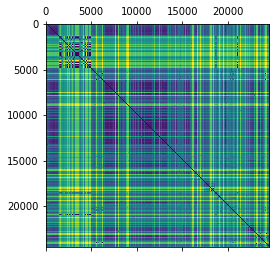

In [74]:
plt.matshow(prescriber_dist)

In [75]:
prescriber_specialty_generic_df.iloc[11455,0:4]

npi                             1497732994
specialty_description    Internal Medicine
total_claim_count                     2004
drug_count                              61
Name: 11455, dtype: object

In [76]:
# The prescriber referenced at position 17368 is an Internal Medicine. 
# We can now calculate the prescribers most similar to this Internal Medicine.
prescriber_dist[11455,:]

array([0.30029823, 0.51825551, 0.52069512, ..., 0.80229537, 0.50724409,
       0.44625074])

In [77]:
# plotting the distances we can see that prescribers most like are probably also Internal Medicine.
#plt.scatter(np.arange(prescriber_dist.shape[0]),prescriber_dist[11455,:])

In [78]:
plt.scatter(np.arange(prescriber_dist.shape[0]),np.sort(prescriber_dist[11455,:]))

In [79]:
providers_sorted = np.lexsort((prescriber_dist[:,11455].tolist(),))

In [80]:
prescriber_specialty_generic_df.iloc[:,0:2].as_matrix()[providers_sorted[0:40],:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[1497732994, 'Internal Medicine'],
       [1376526442, 'Family Practice'],
       [1053398602, 'Internal Medicine'],
       [1831195601, 'Internal Medicine'],
       [1063464246, 'Internal Medicine'],
       [1619929627, 'Internal Medicine'],
       [1992807382, 'Internal Medicine'],
       [1861496457, 'Internal Medicine'],
       [1487634952, 'Family Practice'],
       [1841215969, 'Internal Medicine'],
       [1508813346, 'Internal Medicine'],
       [1447309059, 'Internal Medicine'],
       [1780758607, 'Family Practice'],
       [1447212154, 'Internal Medicine'],
       [1104864925, 'Internal Medicine'],
       [1598744344, 'Internal Medicine'],
       [1780732552, 'Internal Medicine'],
       [1649259250, 'Internal Medicine'],
       [1922092121, 'Family Practice'],
       [1447328018, 'Geriatric Medicine'],
       [1275534174, 'Internal Medicine'],
       [1316225659, 'Internal Medicine'],
       [1396813614, 'Internal Medicine'],
       [1396737581, 'Internal Medicine'],

In [81]:
np.lexsort(((-1 * pf_matrix[11455,:]).tolist(),))[0:17]

array([ 647,  705,  496,  832,  671,  930,  965,   55,  674,  346,   43,
        729, 1027,  183,   88,  662,  672], dtype=int64)

In [82]:
generic_array[np.lexsort(((-1 * pf_matrix[11455,:]).tolist(),))][0:16]

Index(['LEVOTHYROXINE SODIUM', 'METFORMIN HCL', 'FUROSEMIDE', 'OMEPRAZOLE',
       'LOSARTAN POTASSIUM', 'POTASSIUM CHLORIDE', 'QUETIAPINE FUMARATE',
       'AMLODIPINE BESYLATE', 'LOVASTATIN', 'DONEPEZIL HCL', 'ALPRAZOLAM',
       'METOPROLOL SUCCINATE', 'SIMVASTATIN', 'CARVEDILOL',
       'ATORVASTATIN CALCIUM', 'LISINOPRIL'],
      dtype='object')

In [83]:
part_d_df_small[part_d_df_small["npi"]==1497732994].sort_values("total_claim_count", ascending=False)

npi nppes_provider_city nppes_provider_state  \
2646029   1497732994     MONROE TOWNSHIP                   NJ   
9070036   1497732994     MONROE TOWNSHIP                   NJ   
7391102   1497732994     MONROE TOWNSHIP                   NJ   
1738035   1497732994     MONROE TOWNSHIP                   NJ   
24627984  1497732994     MONROE TOWNSHIP                   NJ   
23386047  1497732994     MONROE TOWNSHIP                   NJ   
5409629   1497732994     MONROE TOWNSHIP                   NJ   
16707099  1497732994     MONROE TOWNSHIP                   NJ   
24612295  1497732994     MONROE TOWNSHIP                   NJ   
11579131  1497732994     MONROE TOWNSHIP                   NJ   
21173333  1497732994     MONROE TOWNSHIP                   NJ   
13827471  1497732994     MONROE TOWNSHIP                   NJ   
1756906   1497732994     MONROE TOWNSHIP                   NJ   
19403285  1497732994     MONROE TOWNSHIP                   NJ   
17675683  1497732994     MONROE TOWNSHIP                   NJ   
6749304   1497732994     MONROE TOWNSHIP                   NJ   
14046066  1497732994     MONROE TOWNSHIP                   NJ   
3488515   1497732994     MONROE TOWNSHIP                   NJ   
19037368  1497732994     MONROE TOWNSHIP                   NJ   
21839612  1497732994     MONROE TOWNSHIP                   NJ   
21874799  1497732994     MONROE TOWNSHIP                   NJ   
3390039   1497732994     MONROE TOWNSHIP                   NJ   
1168115   1497732994     MONROE TOWNSHIP                   NJ   
23412356  1497732994     MONROE TOWNSHIP                   NJ   
22512558  1497732994     MONROE TOWNSHIP                   NJ   
8918021   1497732994     MONROE TOWNSHIP                   NJ   
1904651   1497732994     MONROE TOWNSHIP                   NJ   
13896764  1497732994     MONROE TOWNSHIP                   NJ   
12414869  1497732994     MONROE TOWNSHIP                   NJ   
12409456  1497732994     MONROE TOWNSHIP                   NJ   
...              ...                 ...                  ...   
23645341  1497732994     MONROE TOWNSHIP                   NJ   
1326243   1497732994     MONROE TOWNSHIP                   NJ   
15709674  1497732994     MONROE TOWNSHIP                   NJ   
3643549   1497732994     MONROE TOWNSHIP                   NJ   
24732008  1497732994     MONROE TOWNSHIP                   NJ   
20516954  1497732994     MONROE TOWNSHIP                   NJ   
21619441  1497732994     MONROE TOWNSHIP                   NJ   
24165618  1497732994     MONROE TOWNSHIP                   NJ   
32946     1497732994     MONROE TOWNSHIP                   NJ   
1766310   1497732994     MONROE TOWNSHIP                   NJ   
18496505  1497732994     MONROE TOWNSHIP                   NJ   
12403210  1497732994     MONROE TOWNSHIP                   NJ   
15056521  1497732994     MONROE TOWNSHIP                   NJ   
19199843  1497732994     MONROE TOWNSHIP                   NJ   
20340836  1497732994     MONROE TOWNSHIP                   NJ   
18673921  1497732994     MONROE TOWNSHIP                   NJ   
14022248  1497732994     MONROE TOWNSHIP                   NJ   
20354813  1497732994     MONROE TOWNSHIP                   NJ   
22731832  1497732994     MONROE TOWNSHIP                   NJ   
17099850  1497732994     MONROE TOWNSHIP                   NJ   
6800383   1497732994     MONROE TOWNSHIP                   NJ   
5580929   1497732994     MONROE TOWNSHIP                   NJ   
2392354   1497732994     MONROE TOWNSHIP                   NJ   
13847510  1497732994     MONROE TOWNSHIP                   NJ   
2643176   1497732994     MONROE TOWNSHIP                   NJ   
1169262   1497732994     MONROE TOWNSHIP                   NJ   
16100412  1497732994     MONROE TOWNSHIP                   NJ   
16187366  1497732994     MONROE TOWNSHIP                   NJ   
7936302   1497732994     MONROE TOWNSHIP                   NJ   
18256331  1497732994     MONROE TOWNSHIP            